## SKYHACK 2.0 - HACKATHON

***Optimising Call Center Operations***

**Ishika Sharma** & **Suman Jyani**

*Master of Operational Research,
University of Delhi*

2023-2025

Importing the necessary libraries :

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the data files to be utilised :

In [ ]:
calls = pd.read_csv("callsf0d4f5a.csv")
customers = pd.read_csv("customers2afd6ea.csv")
reason = pd.read_csv("reason18315ff.csv")
sentiment_statistics = pd.read_csv("sentiment_statisticscc1e57a.csv")
test = pd.read_csv("testbc7185d.csv")

Exploratory Data Analysis :

In [ ]:
calls.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...


In [ ]:
customers.head()

,customer_id,customer_name,elite_level_code
0,2033123310,Matthew Foster,4.0
1,8186702651,Tammy Walters,NaN
2,2416856629,Jeffery Dixon,NaN
3,1154544516,David Wilkins,2.0
4,5214456437,Elizabeth Daniels,0.0


In [ ]:
customers["elite_level_code"].isnull().sum()

25767

In [ ]:
reason.head()

,call_id,primary_call_reason
0,4667960400,Voluntary Cancel
1,1122072124,Booking
2,6834291559,IRROPS
3,2266439882,Upgrade
4,1211603231,Seating


In [ ]:
print(reason["primary_call_reason"].value_counts())

primary_call_reason
IRROPS                     13057
Voluntary Change           10291
Seating                     6223
Mileage Plus                5487
Post-Flight                 3869
Communications              3779
Products and Services       2792
Upgrade                     2682
Baggage                     2616
Booking                     2589
Checkout                    1840
Check-In                    1490
Voluntary Cancel            1304
Digital Support              996
ETC                          930
Traveler Updates             772
Schedule Change              707
Other Topics                 568
Products & Services          476
Disability                   394
Check In                     385
Post Flight                  373
Voluntary  Cancel            278
IRROPS                       254
Other  Topics                234
Voluntary Change             208
Voluntary   Change           200
Voluntary  Change            149
Seating                      142
Digital   Support      

In [ ]:
sentiment_statistics.head()

,call_id,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,963118,neutral,angry,-0.04,0.39
1,1122072124,519057,calm,neutral,0.02,0.35
2,6834291559,158319,neutral,polite,-0.13,0.32
3,2266439882,488324,neutral,frustrated,-0.20,0.20
4,1211603231,721730,neutral,polite,-0.05,0.35


In [ ]:
sentiment_statistics[["agent_tone","average_sentiment"]].isnull().sum()

,0
agent_tone,217
average_sentiment,109


Generating a new dataframe to get Handle time and Waiting time distributions :

In [ ]:
new_calls = calls[["call_id","customer_id","agent_id"]].copy()

In [ ]:
# Convert the relevant columns to datetime objects
calls["agent_assigned_datetime"] = pd.to_datetime(calls["agent_assigned_datetime"], errors='coerce')
calls["call_start_datetime"] = pd.to_datetime(calls["call_start_datetime"], errors='coerce')
calls["call_end_datetime"] = pd.to_datetime(calls["call_end_datetime"], errors='coerce')

In [ ]:
# Calculating the time differences
new_calls["waiting_time"] = calls["agent_assigned_datetime"] - calls["call_start_datetime"]
new_calls["waiting_time"] = new_calls["waiting_time"].dt.total_seconds()/60    #conversion to Minutes
new_calls["handle_time"] = calls["call_end_datetime"] - calls["agent_assigned_datetime"]
new_calls["handle_time"] = new_calls["handle_time"].dt.total_seconds()/60   #conversion to Minutes

In [ ]:
new_calls.head()

,call_id,customer_id,agent_id,waiting_time,handle_time
0,4667960400,2033123310,963118,7.0,31.0
1,1122072124,8186702651,519057,3.0,12.0
2,6834291559,2416856629,158319,8.0,19.0
3,2266439882,1154544516,488324,5.0,7.0
4,1211603231,5214456437,721730,10.0,9.0


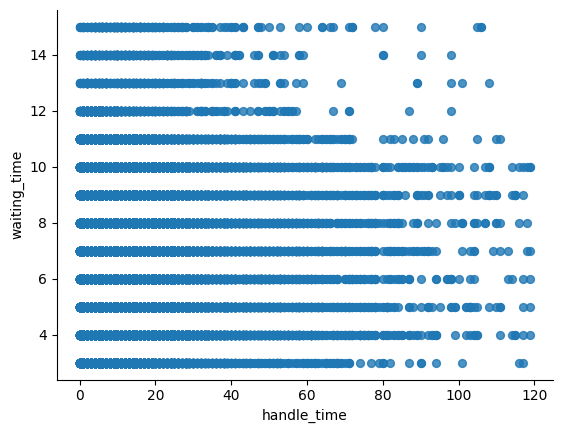

In [ ]:
from matplotlib import pyplot as plt
new_calls.plot(kind='scatter', x='handle_time', y='waiting_time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

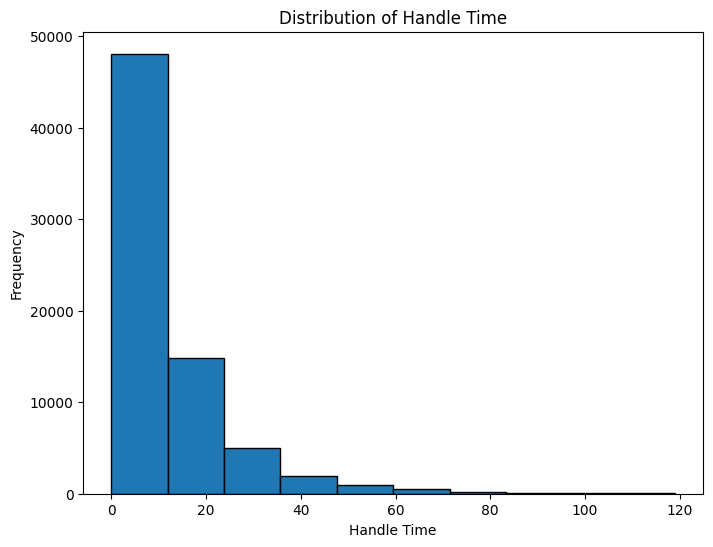

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(new_calls['handle_time'], bins=10, edgecolor='black')
plt.xlabel('Handle Time')
plt.ylabel('Frequency')
_ = plt.title('Distribution of Handle Time')

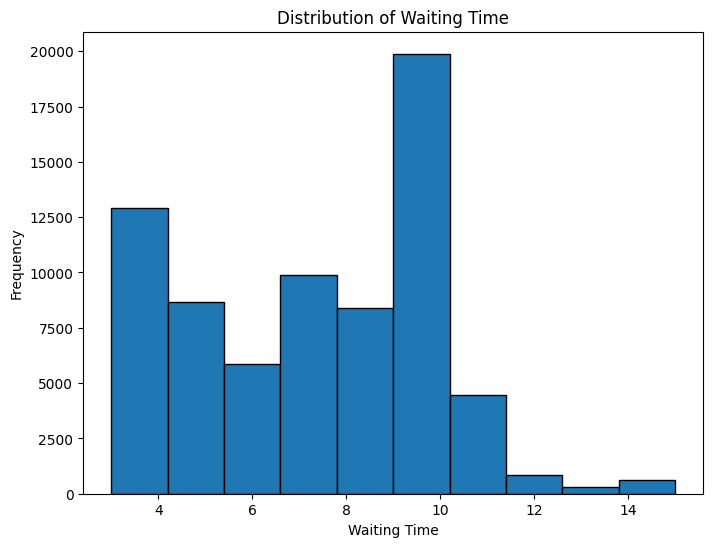

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(new_calls['waiting_time'], bins=10, edgecolor='black')
plt.xlabel('Waiting Time')
plt.ylabel('Frequency')
_ = plt.title('Distribution of Waiting Time')

In [ ]:
#AVERAGE HANDLE TIME
aht = new_calls["handle_time"].mean()
print(aht)

11.61747667455786


In [ ]:
#AVERAGE SPEED TO ANSWER
ast = new_calls["waiting_time"].mean()
print(ast)

7.284458988998747


Generating a merged dataset to identify relationships among variables :

In [ ]:
df = pd.merge(reason, sentiment_statistics, on="call_id")

In [ ]:
df2 = pd.merge(new_calls, df, on=["call_id","agent_id"])

In [ ]:
df2.dropna()

,call_id,customer_id,agent_id,waiting_time,handle_time,primary_call_reason,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,2033123310,963118,7.0,31.0,Voluntary Cancel,neutral,angry,-0.04,0.39
1,1122072124,8186702651,519057,3.0,12.0,Booking,calm,neutral,0.02,0.35
2,6834291559,2416856629,158319,8.0,19.0,IRROPS,neutral,polite,-0.13,0.32
3,2266439882,1154544516,488324,5.0,7.0,Upgrade,neutral,frustrated,-0.20,0.20
4,1211603231,5214456437,721730,10.0,9.0,Seating,neutral,polite,-0.05,0.35
...,...,...,...,...,...,...,...,...,...,...
66648,7569738090,7367304988,783441,6.0,10.0,Mileage Plus,neutral,frustrated,-0.19,0.51
66649,1563273072,8022667294,413148,9.0,28.0,Post Flight,calm,calm,0.05,0.34
66650,8865997781,4474867021,980156,3.0,8.0,Upgrade,calm,frustrated,0.03,0.22
66651,8019240181,9762042472,616988,6.0,6.0,Upgrade,calm,polite,0.05,0.42


In [ ]:
df2 = df2.replace([np.inf, -np.inf], np.nan)  # Replace inf with NaN
df2 = df2.dropna()

In [ ]:
df2.head()

,call_id,customer_id,agent_id,waiting_time,handle_time,primary_call_reason,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,2033123310,963118,7.0,31.0,Voluntary Cancel,neutral,angry,-0.04,0.39
1,1122072124,8186702651,519057,3.0,12.0,Booking,calm,neutral,0.02,0.35
2,6834291559,2416856629,158319,8.0,19.0,IRROPS,neutral,polite,-0.13,0.32
3,2266439882,1154544516,488324,5.0,7.0,Upgrade,neutral,frustrated,-0.20,0.20
4,1211603231,5214456437,721730,10.0,9.0,Seating,neutral,polite,-0.05,0.35


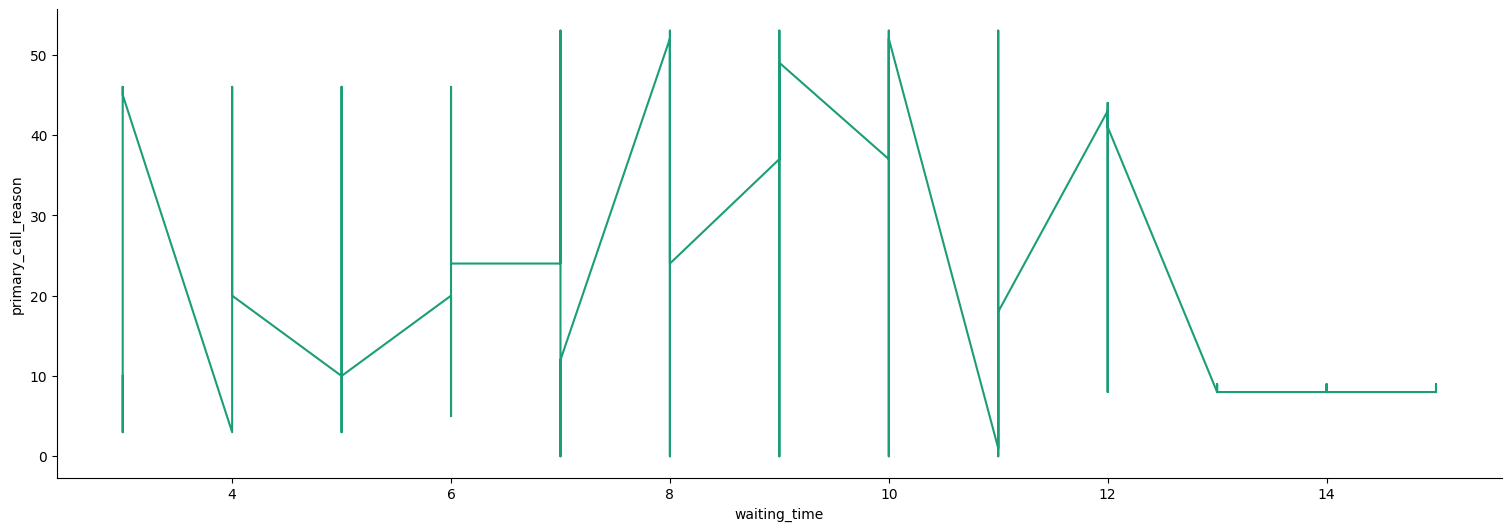

In [64]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['waiting_time']
  ys = series['primary_call_reason']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(15, 5.2), layout='constrained')
df_sorted = df2.sort_values('waiting_time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('waiting_time')
_ = plt.ylabel('primary_call_reason')

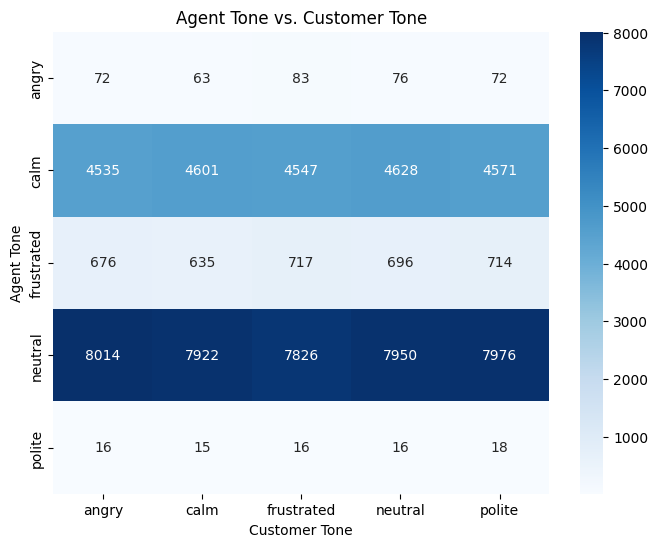

In [ ]:
tone_matrix = df2.groupby(['agent_tone', 'customer_tone']).size().unstack()

plt.figure(figsize=(8, 6))
sns.heatmap(tone_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Customer Tone')
plt.ylabel('Agent Tone')
_ = plt.title('Agent Tone vs. Customer Tone')

Converting categorical data to quantitative values using "LabelEncoder" Class :

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

le_primary_call_reason = LabelEncoder()
df2["primary_call_reason"] = le_primary_call_reason.fit_transform(df2["primary_call_reason"])

le_agent_tone = LabelEncoder()
df2["agent_tone"] = le_agent_tone.fit_transform(df2["agent_tone"])

le_customer_tone = LabelEncoder()
df2["customer_tone"] = le_customer_tone.fit_transform(df2["customer_tone"])

Visualsing the variable relationships using encoded dataframe :

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


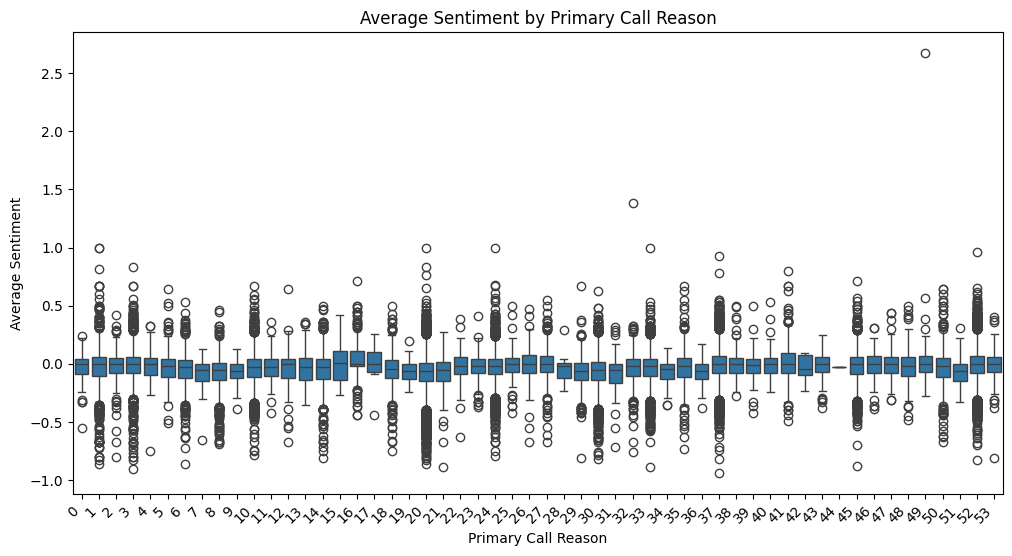

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='primary_call_reason', y='average_sentiment', data=df2)
plt.xlabel('Primary Call Reason')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment by Primary Call Reason')
_ = plt.xticks(rotation=45, ha='right')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

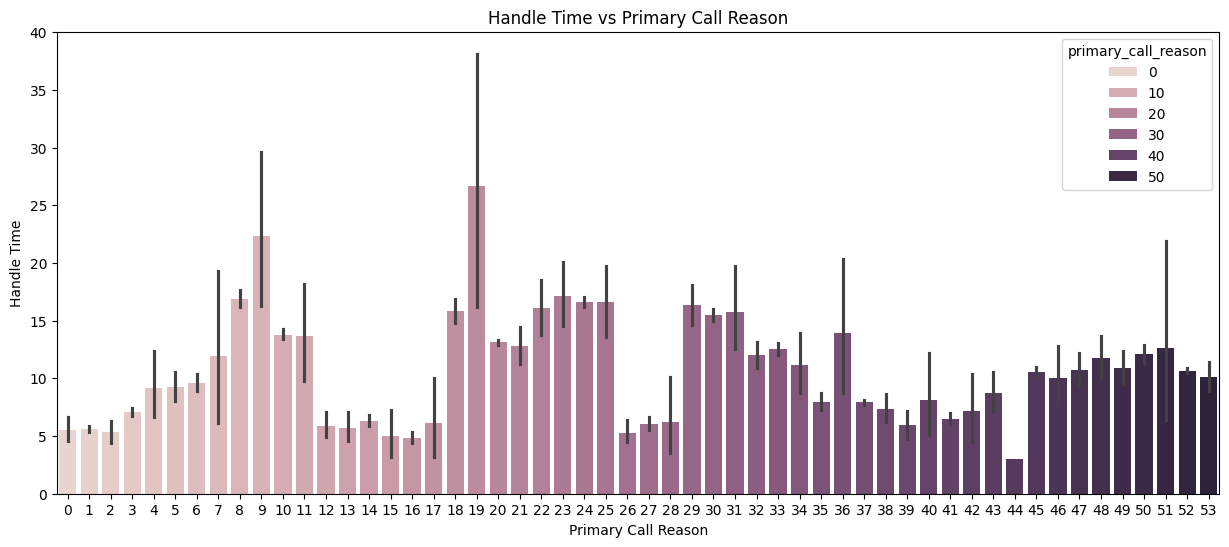

In [ ]:
plt.figure(figsize=(15, 6))
sns.barplot(x="primary_call_reason", y="handle_time", hue="primary_call_reason", data = df2)
plt.title("Handle Time vs Primary Call Reason")
plt.xlabel("Primary Call Reason")
plt.ylabel("Handle Time")
plt.show()

In [ ]:
average_handling_time_by_reason = df2.groupby('primary_call_reason')['handle_time'].mean()

# Finding the most and least frequent call reasons
value_counts = df2['primary_call_reason'].value_counts()
most_frequent_reason = value_counts.idxmax()
least_frequent_reason = value_counts.idxmin()

# Average handling time for the most and least frequent reasons
avg_handling_time_most_frequent = average_handling_time_by_reason[most_frequent_reason]
avg_handling_time_least_frequent = average_handling_time_by_reason[least_frequent_reason]

# Calculating the percentage difference
percentage_difference = ((avg_handling_time_most_frequent - avg_handling_time_least_frequent) / avg_handling_time_least_frequent) * 100

print(f"Average handling time for most frequent reason ({most_frequent_reason}): {avg_handling_time_most_frequent}")
print(f"Average handling time for least frequent reason ({least_frequent_reason}): {avg_handling_time_least_frequent}")
print(f"Percentage difference in average handling time: {percentage_difference:.2f}%")

Average handling time for most frequent reason (20): 13.116593651525632
Average handling time for least frequent reason (44): 3.0
Percentage difference in average handling time: 337.22%


In [ ]:
def get_labels(specific_values, le_primary_call_reason):
  labels = le_primary_call_reason.inverse_transform(specific_values)
  return labels

specific_values = np.array([20, 44])
labels = get_labels(specific_values, le_primary_call_reason)
print(labels)

['IRROPS' 'Unaccompanied Minor  ']


Correlation Matrix to check for relationship among variables :

In [ ]:
correlation_matrix = df2.corr()
print(correlation_matrix)

                          call_id  customer_id  agent_id  waiting_time  \
call_id                  1.000000    -0.004054 -0.002429     -0.002027   
customer_id             -0.004054     1.000000 -0.003822      0.000802   
agent_id                -0.002429    -0.003822  1.000000     -0.000003   
waiting_time            -0.002027     0.000802 -0.000003      1.000000   
handle_time             -0.004113    -0.002268  0.000127     -0.027876   
primary_call_reason     -0.005028     0.003744 -0.000610      0.325928   
agent_tone               0.004816    -0.003987  0.000993     -0.026138   
customer_tone           -0.001855     0.002400 -0.005995     -0.000406   
average_sentiment       -0.003108     0.002633 -0.002127      0.042283   
silence_percent_average -0.000346    -0.000670 -0.004903     -0.013089   

                         handle_time  primary_call_reason  agent_tone  \
call_id                    -0.004113            -0.005028    0.004816   
customer_id                -0.002268   

Identifying relationships with comparitively high correlation

In [ ]:
high_correlation_values = correlation_matrix[(correlation_matrix > 0.2) | (correlation_matrix < -0.2)]
print(high_correlation_values)

                         call_id  customer_id  agent_id  waiting_time  \
call_id                      1.0          NaN       NaN           NaN   
customer_id                  NaN          1.0       NaN           NaN   
agent_id                     NaN          NaN       1.0           NaN   
waiting_time                 NaN          NaN       NaN      1.000000   
handle_time                  NaN          NaN       NaN           NaN   
primary_call_reason          NaN          NaN       NaN      0.325928   
agent_tone                   NaN          NaN       NaN           NaN   
customer_tone                NaN          NaN       NaN           NaN   
average_sentiment            NaN          NaN       NaN           NaN   
silence_percent_average      NaN          NaN       NaN           NaN   

                         handle_time  primary_call_reason  agent_tone  \
call_id                          NaN                  NaN         NaN   
customer_id                      NaN              

Identifying Outliers :

In [ ]:
qht1 = df2["handle_time"].quantile(0.25)
qht3 = df2["handle_time"].quantile(0.75)
iqr = qht3 - qht1
outliers = df2[(df2["handle_time"] < qht1 - 1.5 * iqr) | (df2["handle_time"] > qht3 + 1.5 * iqr)]
print(outliers)

          call_id  customer_id  agent_id  waiting_time  handle_time  \
14     3313876732   6748767796    158319           8.0         33.0   
15     9009313118   1937394483    963118           9.0         44.0   
32     3107888571   6813371451    519057           6.0         38.0   
73     5725811355   1773534882    158319           4.0         42.0   
79     3494281557   3732525410    964561           9.0         46.0   
...           ...          ...       ...           ...          ...   
66598  3504075766   2324618148    780490           9.0         39.0   
66615  8727725650   4295424012    506130           7.0         48.0   
66616  4560172425   7907439532    335773           4.0         33.0   
66629  5713760779   3306855958    102574           9.0        115.0   
66637  4035081392   4546905380    370723           8.0         33.0   

       primary_call_reason  agent_tone  customer_tone  average_sentiment  \
14                       5           3              0              -0.0

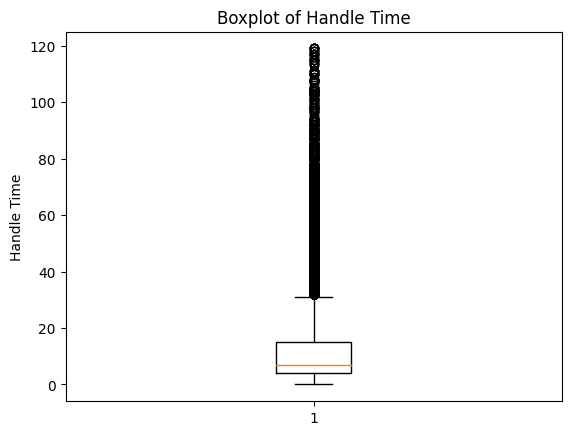

In [ ]:
plt.boxplot(df2["handle_time"])
plt.ylabel("Handle Time")
plt.title("Boxplot of Handle Time")
plt.show()

In [ ]:
qh1 = df2["handle_time"].quantile(0.25)
qh3 = df2["handle_time"].quantile(0.75)
iqr = qh3 - qh1
outliers_ht = df2[(df2["handle_time"] < qh1 - 1.5 * iqr) | (df2["handle_time"] > qh3 + 1.5 * iqr)]
print(outliers_ht)

          call_id  customer_id  agent_id  waiting_time  handle_time  \
14     3313876732   6748767796    158319           8.0         33.0   
15     9009313118   1937394483    963118           9.0         44.0   
32     3107888571   6813371451    519057           6.0         38.0   
73     5725811355   1773534882    158319           4.0         42.0   
79     3494281557   3732525410    964561           9.0         46.0   
...           ...          ...       ...           ...          ...   
66598  3504075766   2324618148    780490           9.0         39.0   
66615  8727725650   4295424012    506130           7.0         48.0   
66616  4560172425   7907439532    335773           4.0         33.0   
66629  5713760779   3306855958    102574           9.0        115.0   
66637  4035081392   4546905380    370723           8.0         33.0   

       primary_call_reason  agent_tone  customer_tone  average_sentiment  \
14                       5           3              0              -0.0

In [ ]:
qw1 = df2["waiting_time"].quantile(0.25)
qw3 = df2["waiting_time"].quantile(0.75)
iqr = qw3 - qw1
outliers_wt = df2[(df2["waiting_time"] < qw1 - 1.5 * iqr) | (df2["waiting_time"] > qw3 + 1.5 * iqr)]
print(outliers_wt)

Empty DataFrame
Columns: [call_id, customer_id, agent_id, waiting_time, handle_time, primary_call_reason, agent_tone, customer_tone, average_sentiment, silence_percent_average]
Index: []


The above result showcases that Waiting time might have virtually no outliers.

Identifying Peak Hours of Call Center :

In [ ]:
df3 = calls[["call_id", "call_start_datetime", "agent_assigned_datetime", "call_end_datetime"]].copy()

In [ ]:
new_df = pd.concat([df3, df2[["waiting_time","handle_time","primary_call_reason"]]], axis=1)

In [ ]:
new_df.dropna()

,call_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,waiting_time,handle_time,primary_call_reason
0,4667960400,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,7.0,31.0,48.0
1,1122072124,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,3.0,12.0,3.0
2,6834291559,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,8.0,19.0,20.0
3,2266439882,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,5.0,7.0,45.0
4,1211603231,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,10.0,9.0,37.0
...,...,...,...,...,...,...,...
66648,3907376917,2024-08-30 15:37:00,2024-08-30 15:44:00,2024-08-30 16:38:00,6.0,10.0,23.0
66649,5608313577,2024-08-30 15:41:00,2024-08-30 15:45:00,2024-08-30 15:45:00,9.0,28.0,29.0
66650,2226758340,2024-08-30 15:37:00,2024-08-30 15:45:00,2024-08-30 15:49:00,3.0,8.0,45.0
66651,8557849956,2024-08-30 15:38:00,2024-08-30 15:47:00,2024-08-30 15:53:00,6.0,6.0,45.0


In [ ]:
new_df.head()

,call_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,waiting_time,handle_time,primary_call_reason
0,4667960400,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,7.0,31.0,48.0
1,1122072124,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,3.0,12.0,3.0
2,6834291559,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,8.0,19.0,20.0
3,2266439882,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,5.0,7.0,45.0
4,1211603231,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,10.0,9.0,37.0


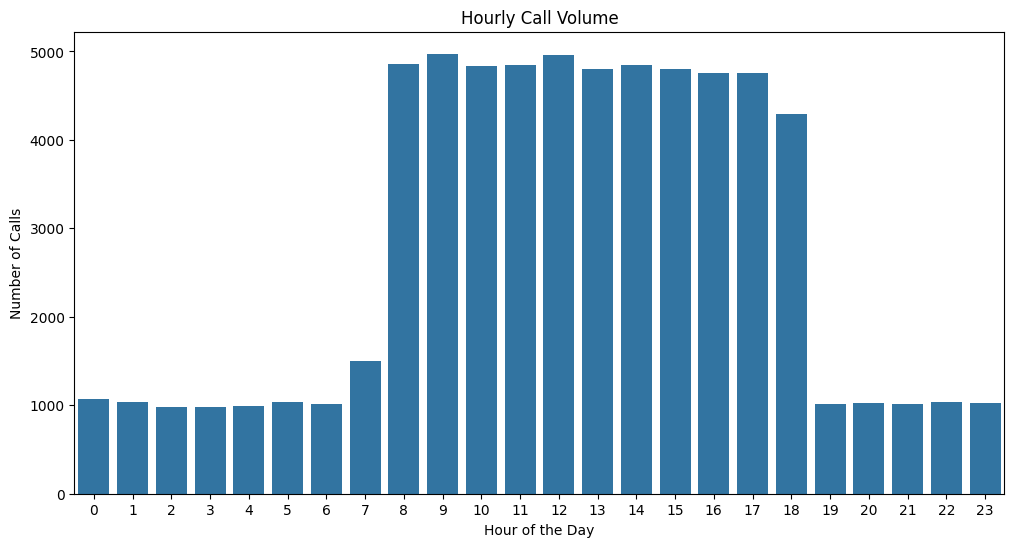

In [ ]:
# Extract hour from start datetime
new_df['hour'] = new_df['call_start_datetime'].dt.hour

# Group by hour and count calls
hourly_calls = new_df.groupby('hour')['handle_time'].count()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_calls.index, y=hourly_calls.values)
plt.title('Hourly Call Volume')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Calls')
plt.show()

In [ ]:
# Group by hour and call reason, then count occurrences
grouped_data = new_df.groupby(['hour', 'primary_call_reason']).size().reset_index(name='count')

# Sort by count in descending order
sorted_data = grouped_data.sort_values(by='count', ascending=False)

# Find major reasons for each hour (e.g., top 5)
n = 5
for hour in new_df['hour'].unique():
    major_reasons = sorted_data[sorted_data['hour'] == hour].head(n)
    print(f"Hour {hour}:")
    print(major_reasons)

Hour 23:
      hour  primary_call_reason  count
1071    23                 20.0    240
1095    23                 52.0    165
1085    23                 37.0     91
1074    23                 24.0     71
1066    23                 10.0     64
Hour 0:
    hour  primary_call_reason  count
12     0                 20.0    207
38     0                 52.0    184
26     0                 37.0    102
16     0                 24.0     94
23     0                 33.0     51
Hour 1:
    hour  primary_call_reason  count
55     1                 20.0    217
80     1                 52.0    159
69     1                 37.0     95
59     1                 24.0     84
48     1                 10.0     68
Hour 2:
     hour  primary_call_reason  count
97      2                 20.0    182
123     2                 52.0    142
112     2                 37.0     88
101     2                 24.0     70
107     2                 30.0     66
Hour 3:
     hour  primary_call_reason  count
143     3      

In [ ]:
#identifying primary call reasons during peak hour 12
specific_values = np.array([20, 52,37,24,10])
labels = get_labels(specific_values, le_primary_call_reason)
print(labels)

['IRROPS' 'Voluntary Change' 'Seating' 'Mileage Plus' 'Communications']


In [ ]:
print(df2["agent_id"].value_counts())

agent_id
251287    453
963118    440
594957    439
757349    423
686999    421
         ... 
335773      2
391553      2
506130      1
161354      1
547592      1
Name: count, Length: 383, dtype: int64


Finding key drivers of AHT and AST during Peak hours :

In [52]:
condition = df2['handle_time'] > 40
filtered_df = df2[condition]
filtered_df.head()

,call_id,customer_id,agent_id,waiting_time,handle_time,primary_call_reason,agent_tone,customer_tone,average_sentiment,silence_percent_average
15,9009313118,1937394483,963118,9.0,44.0,29,3,0,-0.04,0.33
73,5725811355,1773534882,158319,4.0,42.0,35,3,2,-0.19,0.49
79,3494281557,3732525410,964561,9.0,46.0,37,3,2,-0.01,0.31
93,4886165173,9360139623,964561,10.0,44.0,29,3,2,-0.15,0.41
134,4346744236,4031423656,825827,4.0,52.0,20,3,4,-0.03,0.21


In [58]:
reason = filtered_df["primary_call_reason"].mode()
print(reason)

0    20
Name: primary_call_reason, dtype: int64


In [60]:
specific_values = np.array([20])
labels = get_labels(specific_values, le_primary_call_reason)
print(labels)

['IRROPS']


In [63]:
sentiment = filtered_df["agent_tone"].mode()
print(sentiment)

0    3
Name: agent_tone, dtype: int64


In [65]:
encoded_val = 3
decoded_val = le_agent_tone.inverse_transform([encoded_val])[0]
print(decoded_val)

neutral


In [66]:
condition1 = df2['waiting_time'] > 10
filt_df = df2[condition1]
filt_df.head()

,call_id,customer_id,agent_id,waiting_time,handle_time,primary_call_reason,agent_tone,customer_tone,average_sentiment,silence_percent_average
6,324593040,6774865122,519057,13.0,13.0,8,3,2,0.00,0.25
41,3715152001,7868123546,488324,11.0,3.0,47,1,1,0.44,0.03
65,3991780429,5111382615,519057,11.0,10.0,47,3,1,-0.06,0.27
67,3006081887,8623564699,963118,11.0,26.0,43,3,2,-0.16,0.54
99,3723048188,6674285236,878048,11.0,2.0,0,3,4,0.00,0.55


In [67]:
print(filt_df["primary_call_reason"].mode())

0    52
Name: primary_call_reason, dtype: int64


In [68]:
specific_values = np.array([52])
labels = get_labels(specific_values, le_primary_call_reason)
print(labels)

['Voluntary Change']


In [69]:
print(filt_df["agent_tone"].mode())

0    3
Name: agent_tone, dtype: int64
